# Create moist adiabatic atmosphere w/ isothermal stratosphere

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# climlab
import climlab
from attrdict import AttrDict

# pyrads
import sys
sys.path.append("../")
import pyradsmip
from pyradsmip import pyrads
from scipy.integrate import trapz,simps,cumtrapz

# PyRADS

In [4]:
data = np.load("../data/processed/OLR.npz")
CO2_vec = data["CO2_vec"]
Ts_vec = data["Ts_vec"]
OLR_RRTMG = data["OLR_RRTMG"]
OLR_PyRADS = data["OLR_PyRADS"]

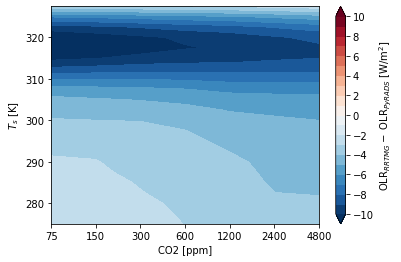

In [27]:
plt.contourf(np.log2(CO2_vec/300.),Ts_vec,OLR_RRTMG-OLR_PyRADS,cmap=plt.get_cmap("RdBu_r"),levels=np.arange(-10.,10.5,1.0),extend="both")
plt.colorbar(ticks=np.arange(-10.,10.5,2.0),label=r"OLR$_{RRTMG}-$ OLR$_{PyRADS}$ [W/m$^{2}$]")
plt.xticks(np.log2(CO2_vec/300.),np.int64(CO2_vec))
plt.xlabel("CO2 [ppm]")
plt.ylabel(r"$T_{s}$ [K]")
plt.savefig("../figures/OLR_bias.png",dpi=200,bbox_inches="tight")

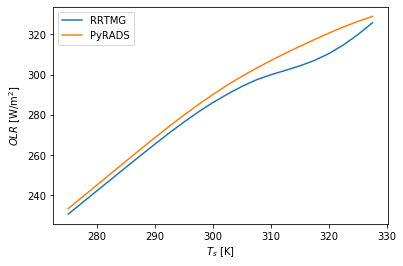

In [30]:
plt.plot(Ts_vec,OLR_RRTMG[:,2],label="RRTMG")
plt.plot(Ts_vec,OLR_PyRADS[:,2],label="PyRADS")
plt.xlabel(r"$T_{s}$ [K]")
plt.ylabel(r"$OLR$ [W/m$^{2}$]")
plt.savefig("../figures/OLR_bias_at_600_ppm.png",dpi=200,bbox_inches="tight")
plt.legend()